[View in Colaboratory](https://colab.research.google.com/github/sungreong/Pymc3_bayseian/blob/master/Advanced_usage_of_Theano_in_PyMC3.ipynb)

In [0]:
!pip install git+https://github.com/pymc-devs/pymc3
!pip install patsy pandas

shared variable 은 함수의 인풋값을 고려하지 않은 것값을 사용할 수 있게 한다. 그리고 후에 변경이 가능하다.  
그래서 이것은 흔히 global variable 과 유사하다

In [0]:
import theano
import theano.tensor as tt

a = tt.scalar("a")
# 0.1 이라는 새로운 초기 shared variable 생성

b= theano.shared(0.1)

func = theano.function([a], a*b)
assert func(2.) == 0.2

b.set_value(10.)
assert func(2.) == 20.

shared variable 들은 배열을 포함하고 또한 같은 차원의 수를 유지하면서 모양을 변경 시킬 수 있다.  

pymc3 에서 shared variables 를 각각의 모델을  재창조하기 위해 노력 없이  몇몇 데이터를 같은 모델에 fitting 시킬 수 있다. 

In [6]:
import numpy as np
import pymc3 as pm
true_mu = [np.random.randn() for _ in range(10) ]
observed_data = [mu + np.random.randn(20) for mu in true_mu ]

print(true_mu)

data = theano.shared(observed_data[0])
3
with pm.Model() as model :
    mu = pm.Normal("mu", 0, 10)
    pm.Normal("y", mu=mu, sd=1 , observed = data)
    
# 각각 데이터 셋에 흔적을 생산

traces = []
for data_vals in observed_data :
    # 관측 데이터 셋
    data.set_value(data_vals)
    with model :
        traces.append(pm.sample())

[-0.09737095742352792, 0.9355176146341863, -0.7034472174786153, -1.0180332978969655, -0.6441510426261643, 1.3673479672027307, 0.08654808824053999, -0.06090982893166405, 0.31849627002520875, 0.15157241483308886]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2284.50it/s]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2256.61it/s]
Auto-assigning

Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2290.18it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2304.37it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2215.60it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2282.34it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1000/1000 [00:00<00:00, 2269.95it/s]


pymc3 api 에서 때떄로 shared_ variables 를 사용한다.  
기계 학습의 일반적인 작업은 보이지 않는 데이터의 값을 예측하는 것이고,이를 달성하는 한 가지 방법은 우리의 관찰을 위해 공유 변수를 사용하는 것입니다.  


In [8]:
x = np.random.randn(100)
y = x > 0

x_shared = theano.shared(x)

with pm.Model() as model:
  coeff = pm.Normal('x', mu=0, sd=1)
  logistic = pm.math.sigmoid(coeff * x_shared)
  pm.Bernoulli('obs', p=logistic, observed=y)

  # fit the model
  trace = pm.sample()

  # Switch out the observations and use `sample_ppc` to predict
  x_shared.set_value([-1, 0, 1.])
  post_pred = pm.sample_ppc(trace, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [x]
100%|██████████| 1000/1000 [00:00<00:00, 1625.96it/s]
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/usr/local/lib/python3.6/dist-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
100%|██████████| 500/500 [00:00<00:00, 514.59it/s]



그러나 현재 셰이프를 처리하는 방식으로 인해 변수 중 하나의 셰이프가 변경되는 경우 공유 변수의 모양을 변경할 수 없습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8e311d898>,
      dtype=object)

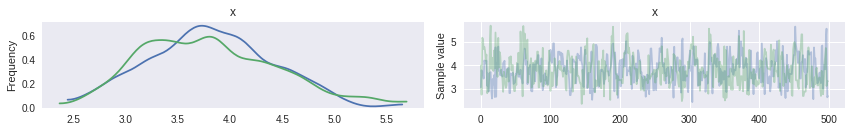

In [10]:
pm.traceplot(trace)

![대체 텍스트](https://preview.ibb.co/bMqZvd/function.png)

In [0]:
from scipy import optimize , special
import numpy as np

def func(mu, theta) :
    thetamu = theta* mu
    value = np.log(mu) + np.logaddexp(0, thetamu)
    return value


def jac(mu, theta) :
    thetamu = theta* mu 
    jac = theta * special.expit(thetamu) + 1 / mu
    return jac

def mu_from_theta(theta) :
    return optimize.newton(func,1 , fprime= jac , args=(0.4, ))


We could wrap mu_from_theta with tt.as_op and use gradient-free methods like Metropolis,   
but to get NUTS and ADVI working, we also need to define the derivative of mu_from_theta.

We can find this derivative using the implicit function theorem,  
or equivalently we take the derivative with respect of θ for both sides of $ R(μ(θ),θ)=0    $   
and solve for $ dμdθ. $ This isn’t hard to do by hand, but for the fun of it, let’s do it using sympy:

$  \frac{d}{dθ}μ(θ)=−\frac{μ(θ)^2}{1+θμ(θ)+e−θμ(θ)} $

In [0]:
import sympy

mu = sympy.Function('mu')
theta = sympy.Symbol('theta')
R = mu(theta) + mu(theta) * sympy.exp(theta * mu(theta)) - 1
solution = sympy.solve(R.diff(theta), mu(theta).diff(theta))[0]



```
import theano
import theano.tensor as tt
import theano.tests.unittest_tools

class MuFromTheta(tt.Op):
    itypes = [tt.dscalar]
    otypes = [tt.dscalar]

    def perform(self, node, inputs, outputs):
        theta, = inputs
        mu = mu_from_theta(theta)
        outputs[0][0] = np.array(mu)

    def grad(self, inputs, g):
        theta, = inputs
        mu = self(theta)
        thetamu = theta * mu
        return [- g[0] * mu ** 2 / (1 + thetamu + tt.exp(-thetamu))]
 ```
## We can now define our model using this new op:
 ```

import pymc3 as pm

tt_mu_from_theta = MuFromTheta()

with pm.Model() as model:
    theta = pm.HalfNormal('theta', sd=1)
    mu = pm.Deterministic('mu', tt_mu_from_theta(theta))
    pm.Normal('y', mu=mu, sd=0.1, observed=[0.2, 0.21, 0.3])

    trace = pm.sample()
```

